## Black-Scholes Prices vs Strike & Maturity This notebook holds the spot price fixed and visualizes call/put prices as functions of strike ($K$) and time to maturity ($T$).

In [1]:
import numpy as np import pandas as pd import seaborn as sns import matplotlib.pyplot as plt from scipy.stats import norm from numpy import log, sqrt, exp  sns.set_theme(style='whitegrid')  class BlackScholes:     def __init__(self, current_price, strike, time_to_maturity, volatility, interest_rate):         self.S = float(current_price)         self.K = float(strike)         self.T = float(time_to_maturity)         self.sigma = float(volatility)         self.r = float(interest_rate)      def price(self):         d1 = (log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * sqrt(self.T))         d2 = d1 - self.sigma * sqrt(self.T)         call = self.S * norm.cdf(d1) - self.K * exp(-self.r * self.T) * norm.cdf(d2)         put = self.K * exp(-self.r * self.T) * norm.cdf(-d2) - self.S * norm.cdf(-d1)         return call, put  def price_grid(spot, strikes, maturities, sigma, r):     call_prices = np.zeros((len(maturities), len(strikes)))     put_prices = np.zeros_like(call_prices)     for i, T in enumerate(maturities):         for j, K in enumerate(strikes):             bs = BlackScholes(spot, K, T, sigma, r)             call_prices[i, j], put_prices[i, j] = bs.price()     return call_prices, put_prices  def plot_heatmap(values, strikes, maturities, title):     fig, ax = plt.subplots(figsize=(9, 6))     sns.heatmap(values, ax=ax, xticklabels=np.round(strikes, 2), yticklabels=np.round(maturities, 2), annot=True, fmt='.2f', cmap='viridis')     ax.set_xlabel('Strike K')     ax.set_ylabel('Time to Maturity T (years)')     ax.set_title(title)     plt.tight_layout()     return fig 

/home/salok1/miniconda/envs/americanOption/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)   from scipy.stats import gaussian_kde 

In [2]:
# Input parameters spot = 100.0 volatility = 0.2 interest_rate = 0.05 strike_range = np.linspace(80, 120, 10) maturity_range = np.linspace(0.1, 2.0, 10) call_prices, put_prices = price_grid(spot, strike_range, maturity_range, volatility, interest_rate) pd.DataFrame({     'Spot price': [spot],     'Volatility': [volatility],     'Risk-free rate': [interest_rate],     'Strike grid': [strike_range.tolist()],     'Maturity grid': [maturity_range.tolist()] }) 

,Spot price,Volatility,Risk-free rate,Strike grid,Maturity grid
0,100.0,0.2,0.05,"[80.0, 84.44444444444444, 88.88888888888889, 9...","[0.1, 0.3111111111111111, 0.5222222222222223, ..."


/tmp/ipykernel_24379/2685320730.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown   fig_call.show() /tmp/ipykernel_24379/2685320730.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown   fig_put.show() 

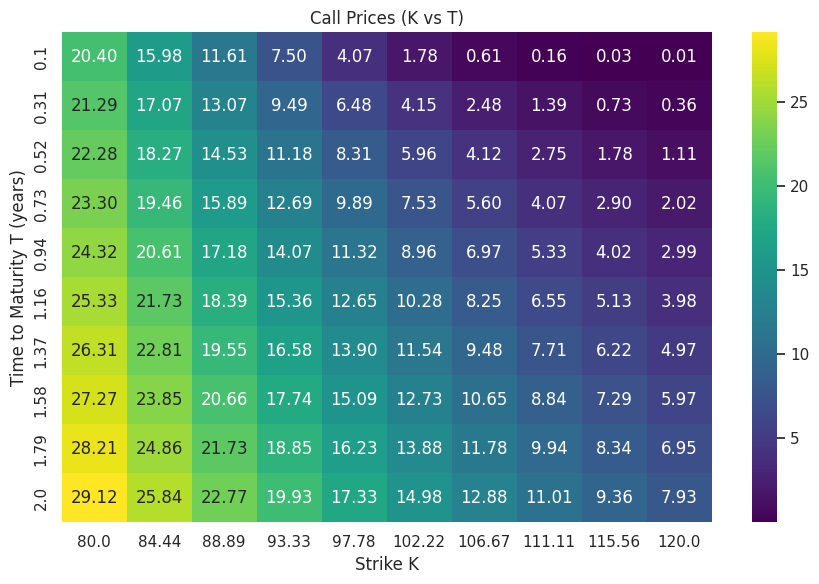

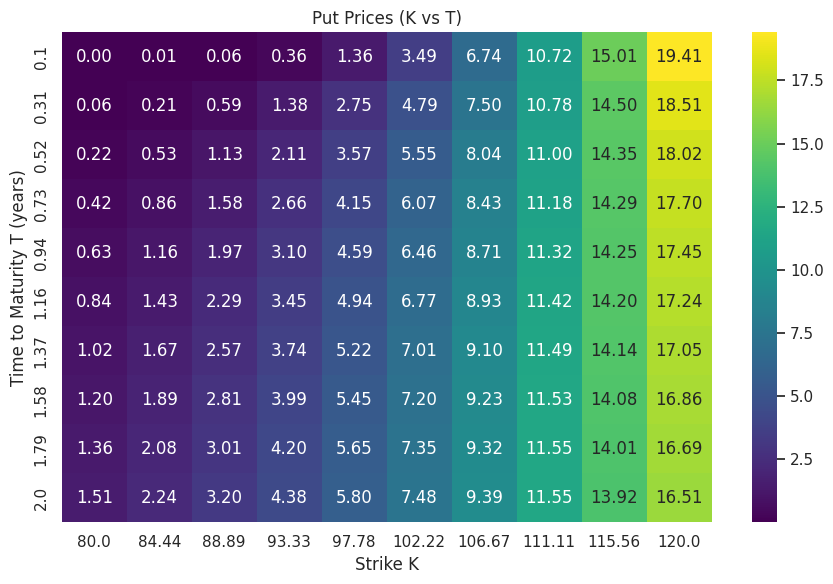

In [3]:
fig_call = plot_heatmap(call_prices, strike_range, maturity_range, 'Call Prices (K vs T)') fig_put = plot_heatmap(put_prices, strike_range, maturity_range, 'Put Prices (K vs T)') fig_call.show() fig_put.show() 